# Autoencoder

In [1]:
import tensorflow as tf
import keras
#caution: I'm using tensorflow 2.0 and keras 2.3. If the google colab complains with an error that keras backend version doesn't support tensorflow 2.0, 
#please modify the from keras.xxx import yyy commands to from tensorflow.keras.xxx import yyy.

Using TensorFlow backend.


In [2]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.3.1


In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
Xtr = x_train.reshape((60000,784))
Xte = x_test.reshape((10000,784))

In [6]:
from keras.layers import Input, Dense
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model # see https://keras.io/getting-started/functional-api-guide/

### Building model using Keras functional API
Keras also lets you build model using functional API, using `Model` class (instead of `Sequential` class). Although you can build a sequential simple model in this example using `Sequential`, it's good to know another method exists.  

In [7]:
inputs = Input(shape=(784,))
h1 = Dense(300,activation='relu')(inputs) 
h2 = Dense(150,activation='relu')(h1)
h3 = Dense(300,activation='relu')(h2)
out = Dense(784)(h3)

In [8]:
model = Model(inputs=inputs, outputs=out)
model.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['mse'])


In [9]:
model.fit(Xtr, Xtr,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(Xte, Xte))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 2756.5979 - mse: 2756.5974 - val_loss: 2124.6542 - val_mse: 2124.6543
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 1999.5938 - mse: 1999.5941 - val_loss: 1900.8147 - val_mse: 1900.8146
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 1841.1833 - mse: 1841.1827 - val_loss: 1742.5572 - val_mse: 1742.5573
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 1709.7361 - mse: 1709.7367 - val_loss: 1687.8407 - val_mse: 1687.8406
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 1651.9161 - mse: 1651.9159 - val_loss: 1611.0668 - val_mse: 1611.0667
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 1623.0899 - mse: 1623.0900 - val_loss: 1593.3961 - val_mse: 1593.3961
Epoch 7/10
60000/60000 [==============================] 

### Visualizing sample images generated by autoencoder

In [10]:
decoded_imgs = model.predict(Xte[:10])

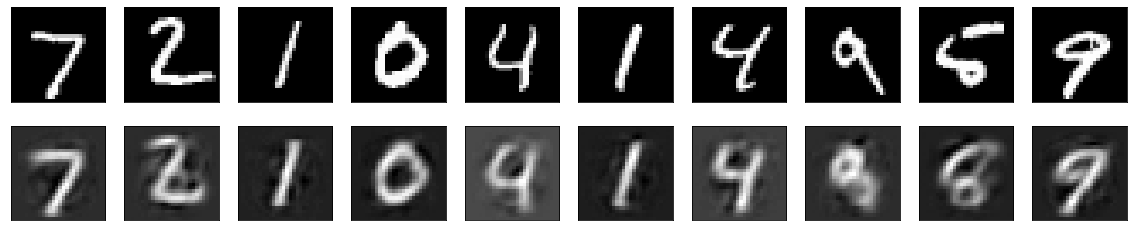

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### To Do: 
1. Try different latent vector dimension values (optimize your epochs and other hyperparams accordingly) and discuss how the latent vector dimension affects how well the autoencoder learned. 
2. Make the encoder and decoder using CNN architecture and compare the results

# Denoising Autoencoder

In [12]:
inputs = Input(shape=(784,))
noise = Dropout(0.3)(inputs)
h1 = Dense(300,activation='relu')(noise) 
h2 = Dense(150,activation='relu')(h1)
h3 = Dense(300,activation='relu')(h2)
out = Dense(784)(h3)

In [13]:
model2 = Model(inputs=inputs, outputs=out)
model2.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['mse'])

In [14]:
model2.fit(Xtr, Xtr,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(Xte, Xte))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 2793.6606 - mse: 2793.6609 - val_loss: 2047.9068 - val_mse: 2047.9070
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 2001.6589 - mse: 2001.6580 - val_loss: 1816.8817 - val_mse: 1816.8818
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 1870.5503 - mse: 1870.5503 - val_loss: 1742.6878 - val_mse: 1742.6877
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 1826.6388 - mse: 1826.6382 - val_loss: 1709.2517 - val_mse: 1709.2518
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 1795.6303 - mse: 1795.6305 - val_loss: 1664.8246 - val_mse: 1664.8247
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 1772.7730 - mse: 1772.7732 - val_loss: 1653.1913 - val_mse: 1653.1912
Epoch 7/10
60000/60000 [==============================] 

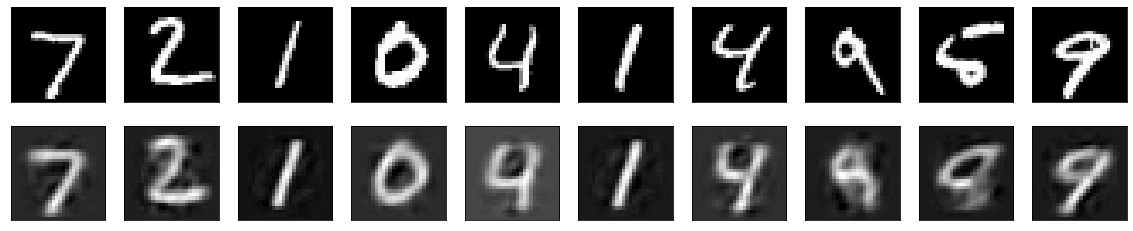

In [15]:
decoded_imgs = model2.predict(Xte[:10])
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Let's try Gaussian Noise 
Mode noise layers: https://keras.io/layers/noise/

In [16]:
from keras.layers import GaussianNoise

In [17]:
inputs = Input(shape=(784,))
noise = GaussianNoise(0.1)(inputs)
h1 = Dense(300,activation='relu')(noise) 
h2 = Dense(150,activation='relu')(h1)
h3 = Dense(300,activation='relu')(h2)
out = Dense(784)(h3)

model3 = Model(inputs=inputs, outputs=out)
model3.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['mse'])

model3.fit(Xtr, Xtr,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(Xte, Xte))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 2744.3626 - mse: 2744.3621 - val_loss: 2158.5235 - val_mse: 2158.5234
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 2090.6428 - mse: 2090.6428 - val_loss: 2018.2031 - val_mse: 2018.2032
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 1993.9605 - mse: 1993.9606 - val_loss: 1943.8747 - val_mse: 1943.8748
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 1948.3908 - mse: 1948.3910 - val_loss: 1943.9684 - val_mse: 1943.9684
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 1917.1581 - mse: 1917.1575 - val_loss: 1904.5122 - val_mse: 1904.5120
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 1896.7904 - mse: 1896.7909 - val_loss: 1895.3171 - val_mse: 1895.3170
Epoch 7/10
60000/60000 [==============================] 

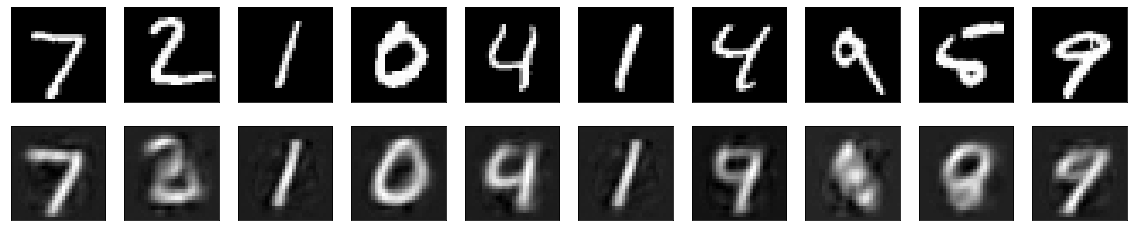

In [18]:
decoded_imgs = model3.predict(Xte[:10])
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**To Do**: Try different values for the hyperparameters or try types of noise 

**Note** 
This notebook is going to be updated. Please check again.